In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp

In [2]:
dtypes={'sex':'category','smoker':'category','region':'category'}
df= pd.read_csv('insurance.csv',dtype=dtypes)

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null category
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null category
region      1338 non-null category
charges     1338 non-null float64
dtypes: category(3), float64(2), int64(2)
memory usage: 46.1 KB


In [6]:
pp.ProfileReport(df)


Number of variables,7
Number of observations,1338
Total Missing (%),0.0%
Total size in memory,46.1 KiB
Average record size in memory,35.3 B
Numeric,4
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [7]:
df=df.drop_duplicates(df.columns).reset_index(drop=True)


In [8]:
df.shape

(1337, 7)

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


In [10]:
df.isna().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

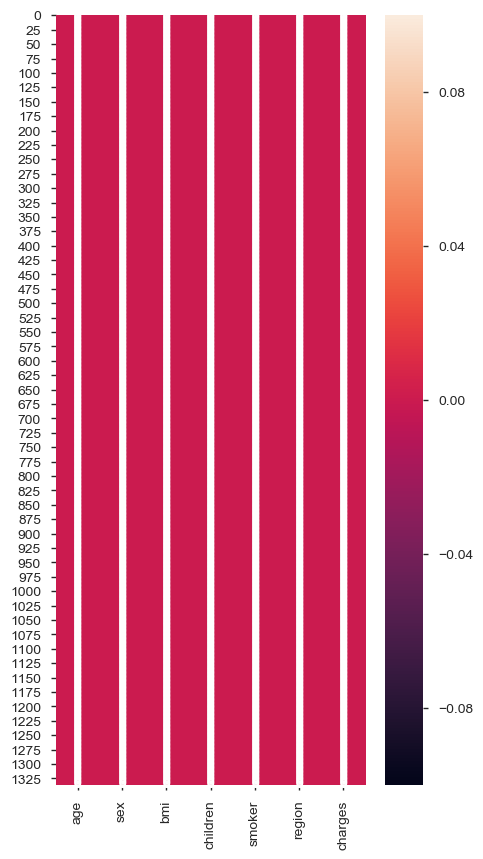

In [11]:
plt.figure(figsize=(5,10))

sns.heatmap(df.isnull(),annot=True)

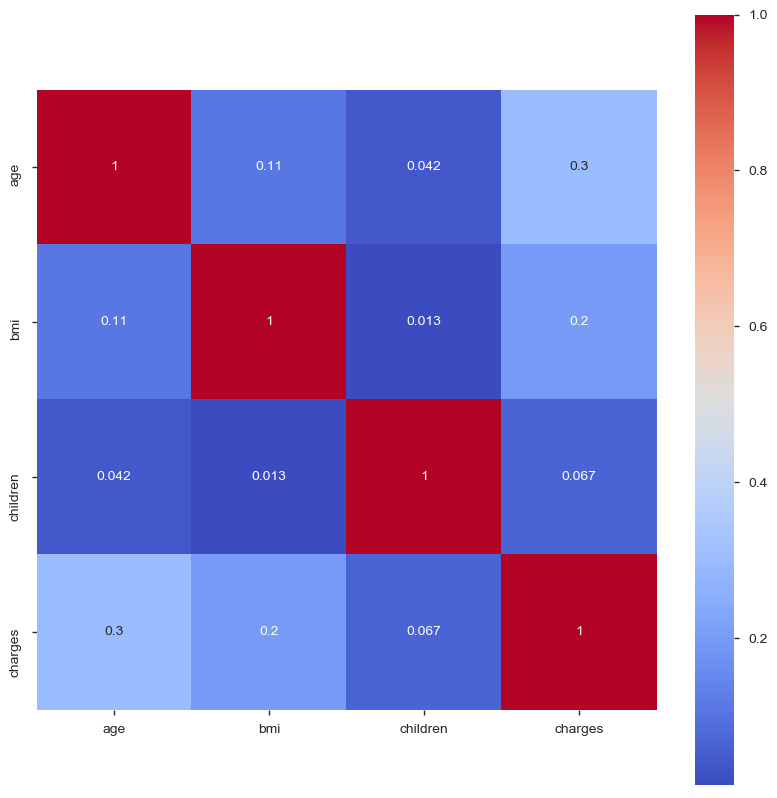

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,square=True,cmap='coolwarm')

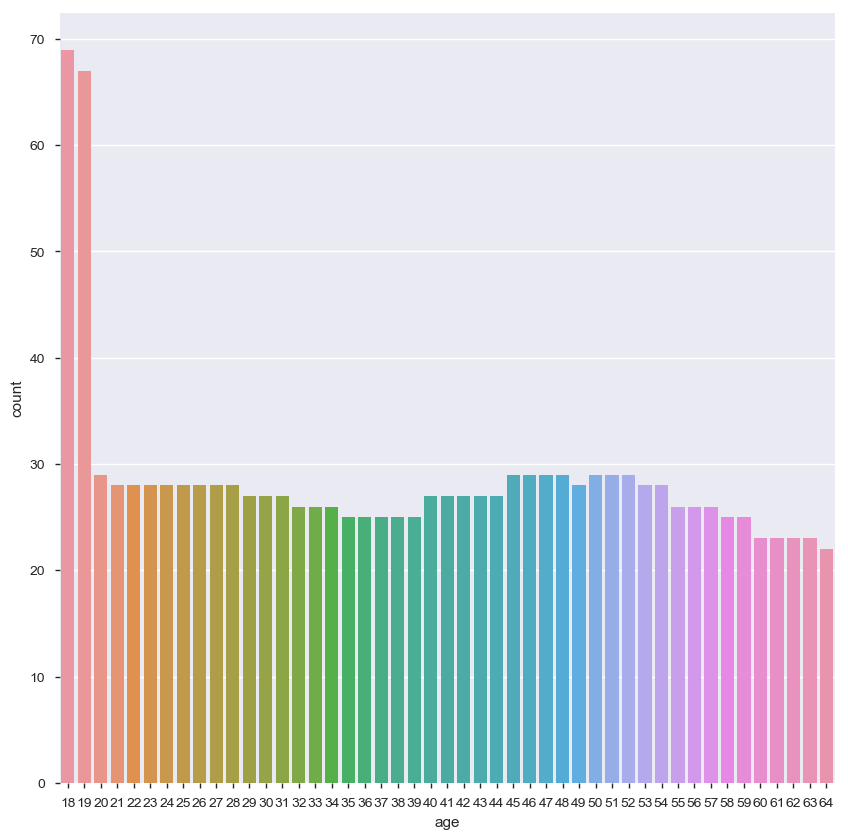

In [13]:
plt.figure(figsize=(10,10))
sns.countplot(df.age)

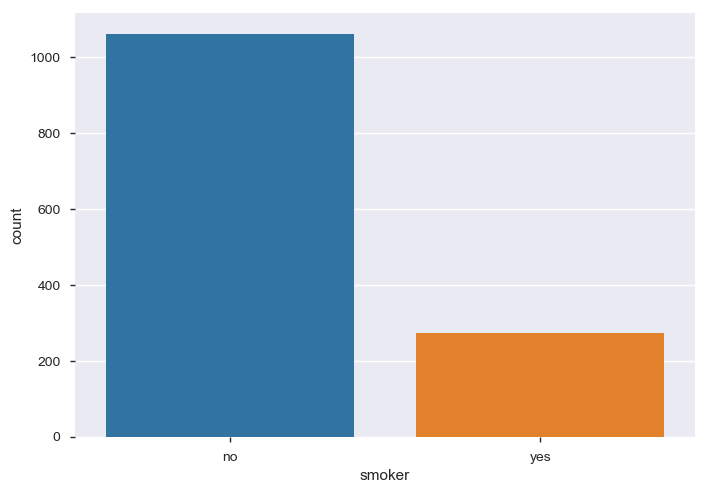

In [14]:
sns.countplot(df.smoker)

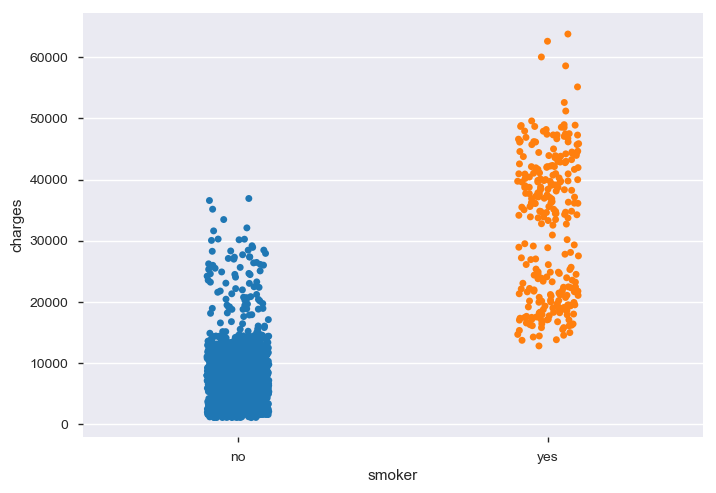

In [15]:
sns.stripplot(df.smoker,df.charges)


In [16]:
df.smoker=df.smoker.replace({"no":0,"yes":1})
df.smoker.head()

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int64

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [18]:
df.sex=df.sex.replace({"female":0,"male":1})
df.sex.head()

0    0
1    1
2    1
3    1
4    1
Name: sex, dtype: int64

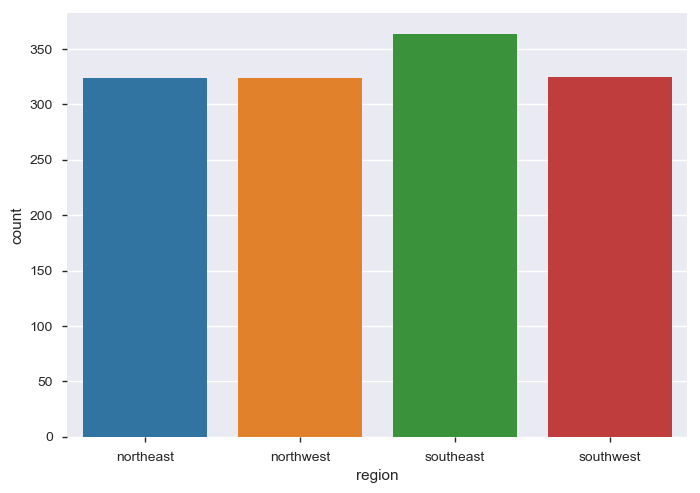

In [19]:
sns.countplot(df.region)

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


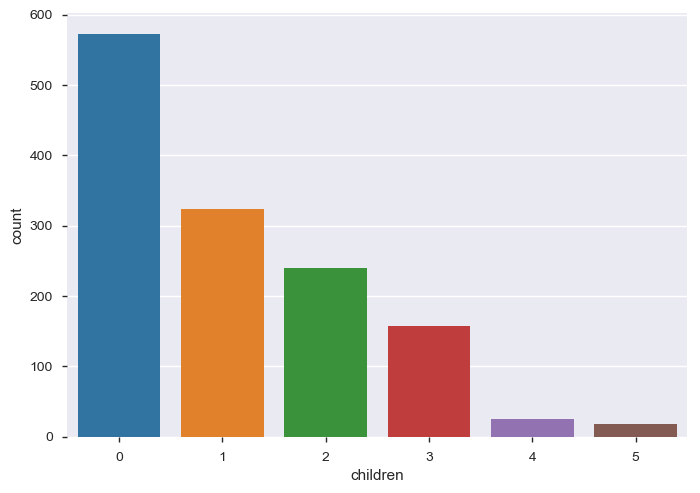

In [21]:
sns.countplot(df.children)

In [22]:
dff=pd.get_dummies(df.children,drop_first=True)
df=pd.concat([df,dff],axis=1)
del df["children"]
df.head()

,age,sex,bmi,smoker,region,charges,1,2,3,4,5
0,19,0,27.900,1,southwest,16884.92400,0,0,0,0,0
1,18,1,33.770,0,southeast,1725.55230,1,0,0,0,0
2,28,1,33.000,0,southeast,4449.46200,0,0,1,0,0
3,33,1,22.705,0,northwest,21984.47061,0,0,0,0,0
4,32,1,28.880,0,northwest,3866.85520,0,0,0,0,0


In [23]:
df1=pd.get_dummies(df.region,drop_first=True)
df=pd.concat([df,df1],axis=1)
del df["region"]
df.head()

,age,sex,bmi,smoker,charges,1,2,3,4,5,northwest,southeast,southwest
0,19,0,27.900,1,16884.92400,0,0,0,0,0,0,0,1
1,18,1,33.770,0,1725.55230,1,0,0,0,0,0,1,0
2,28,1,33.000,0,4449.46200,0,0,1,0,0,0,1,0
3,33,1,22.705,0,21984.47061,0,0,0,0,0,1,0,0
4,32,1,28.880,0,3866.85520,0,0,0,0,0,1,0,0


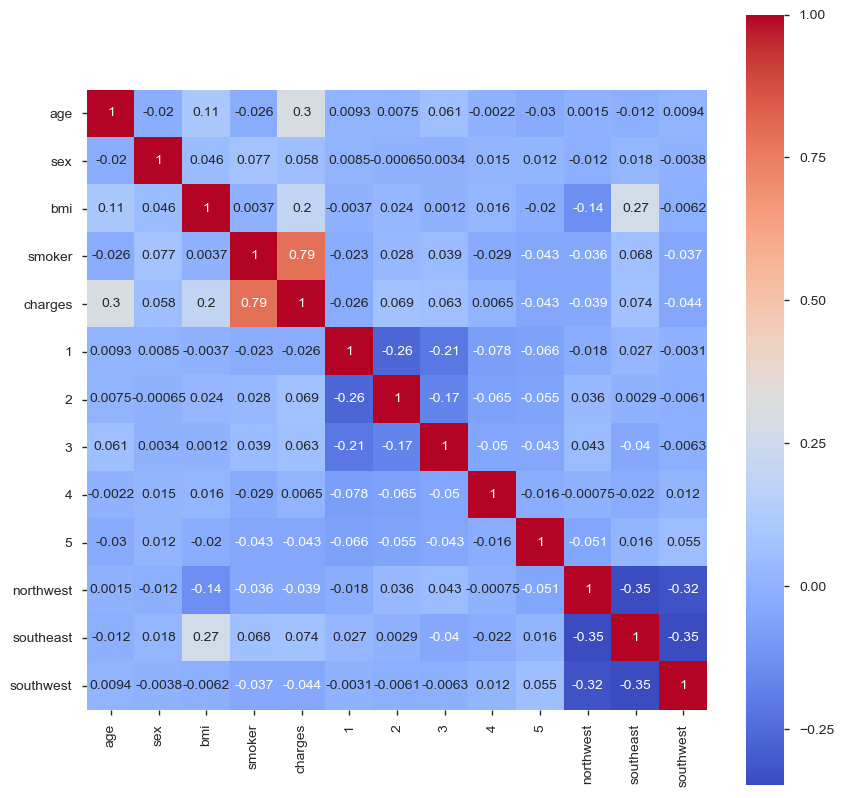

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,square=True,cmap='coolwarm')

In [25]:
X= df.iloc[:,:-1].values
y= df.iloc[:,4].values

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
import xgboost
from xgboost import XGBRegressor
lr=XGBRegressor()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
y_pred_train=lr.predict(X_train)

[22:23:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [29]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))
print(r2_score(y_train,y_pred_train))

0.9995966466394389
0.9999521292265305
